In [2]:
using MAT
using LinearAlgebra
# using Plots

In [1]:
using PlotlyJS
scatter(real(omega), imag(omega))
plot!(abs.(omega))

UndefVarError: UndefVarError: `omega` not defined

In [3]:
vars = matread("./data/LST_Template.mat")
N = 384
y_phys                = cos.(LinRange(0, pi, N))

T = inv(vars["B"]) * vars["A"]
lambda = eigvals(T)
vecs = eigvecs(T)

omega = 1im*lambda   # eigenvalues omega in vector form


sp = (abs.(omega) .> 1e-10) .* ( abs.(omega) .<50)

omega = omega[sp]
vecs = vecs[:, sp]

# remove bad eigenvalues
sp = (abs.(omega).>1e-10) .*  (abs.(omega).<50)

omega = omega[sp]
vecs = vecs[:, sp];

Temperature = vars["D0p"] * vecs[2*N+1:3*N, :];

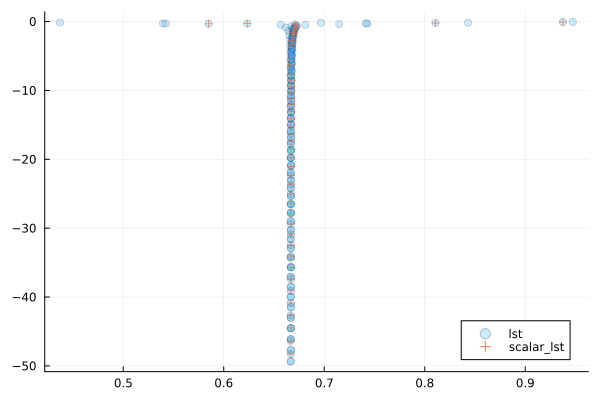

In [127]:
lst_vars = matread("./data/scalar_LST.mat")
scalar_eigvals = eigvals(inv(lst_vars["B"]) * lst_vars["A"] ) * 1im
scalar_eigvecs = eigvecs(inv(lst_vars["B"]) * lst_vars["A"] )


# remove bad eigenvalues
scalar_sp = (abs.(scalar_eigvals).>1e-10) .*  (abs.(scalar_eigvals).<50)

scalar_eigvals = scalar_eigvals[scalar_sp]
scalar_eigvecs = scalar_eigvecs[:, scalar_sp];

scatter(real(omega), imag(omega), label="lst", markeralpha=0.2)
scatter!(real(scalar_eigvals), imag(scalar_eigvals), label="scalar_lst", markeralpha=0.8, marker=:cross,)


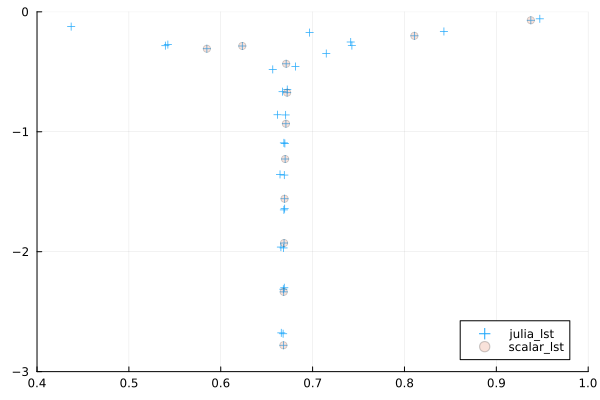

In [128]:
scatter(real(omega), imag(omega), label="julia_lst", markeralpha=0.8, marker=:cross, ylims=(-3, 0), xlims=(0.4, 1))
scatter!(real(lst_vars["omega"]), imag(lst_vars["omega"]), label="scalar_lst", markeralpha=0.2)

["lesgo_v", "lambda", "lst", "lesgo_A"]

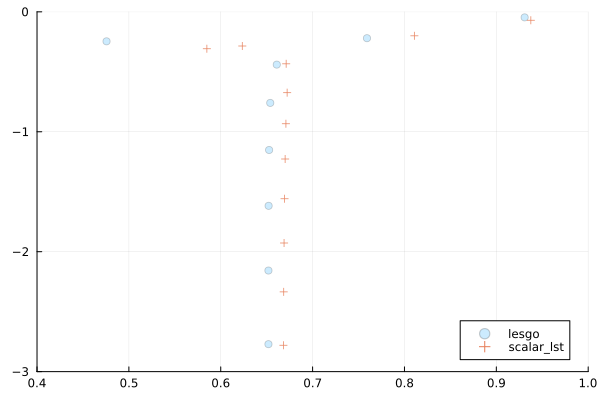

In [129]:
lesgo_vars = matread("./data/lesgo.mat")
print(keys(lesgo_vars))
lesgo_eigvals = log.(eigvals(lesgo_vars["lesgo_A"]))/1e-5/1im * -1
lesgo_eigvecs = eigvecs(lesgo_vars["lesgo_A"])


scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(lst_vars["omega"]), imag(lst_vars["omega"]), label="scalar_lst", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))


In [130]:
z_range = [0, 1]
str_factor = 1.5

z = LinRange(z_range[1], z_range[2], 128+1)
zc = 0.5 * z[2:end] + 0.5 * z[1:end-1]
z_stretch = z_range[2]*(1 .+(tanh.(str_factor*(zc/z_range[2].-1))/tanh(str_factor)));

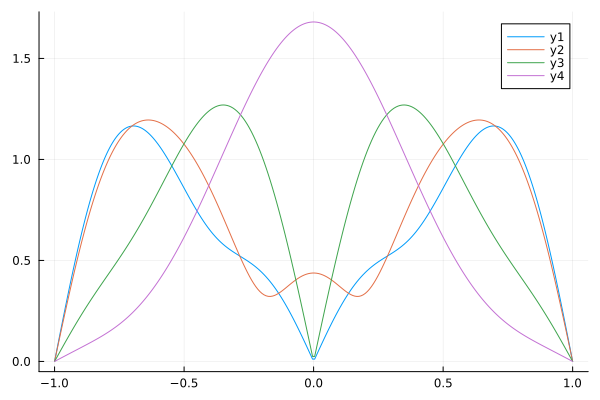

In [131]:
scalar_lst_Temperature = lst_vars["D0p"] * scalar_eigvecs
plot(y_phys, abs.(scalar_lst_Temperature[:, 47:end]))

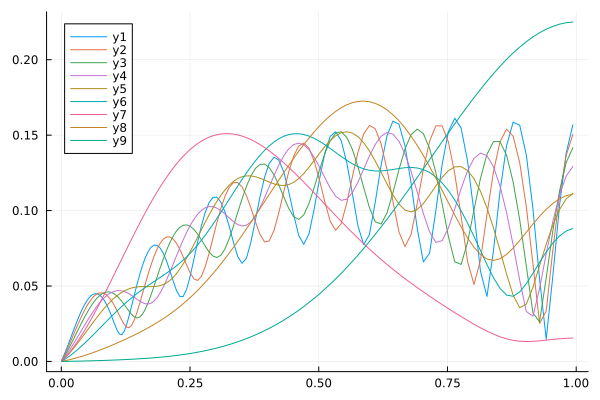

In [132]:
plot(z_stretch, abs.(lesgo_eigvecs[:, 120:end]))

LST eigenvalues = 0.9375566247481218 - 0.07056658667835967im
lesgo eigenvalues = 0.930822739998459 - 0.04644035658978944im


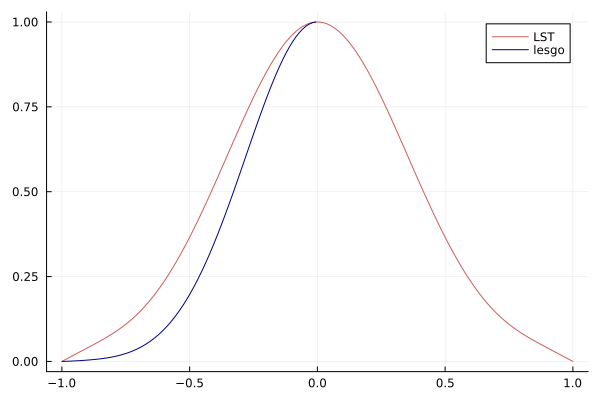

In [133]:
ind = 50
lesgo_ind = 128

print("LST eigenvalues = ", scalar_eigvals[ind], "\n")
print("lesgo eigenvalues = ", lesgo_eigvals[lesgo_ind], "\n")
# plot(y_phys, abs.(q[:, ind])/maximum(abs.(q[:, ind])), label="LST", color="indianred")
plot(y_phys, abs.(scalar_lst_Temperature[:, ind])/maximum(abs.(scalar_lst_Temperature[:, ind])), label="LST", color="indianred")

plot!(z_stretch.-1, abs.(lesgo_eigvecs[:, lesgo_ind])/maximum(abs.(lesgo_eigvecs[:, lesgo_ind])), label="lesgo", color="navy")



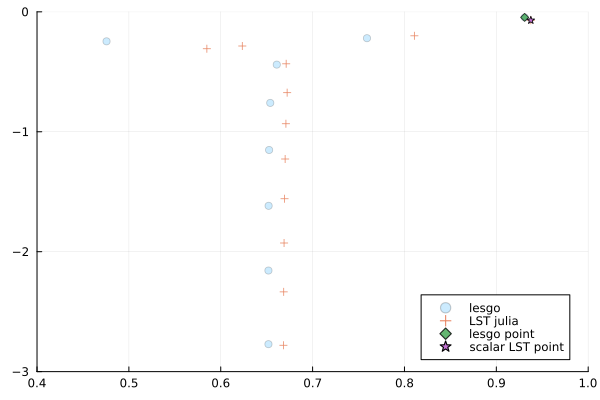

In [134]:
scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(scalar_eigvals), imag(scalar_eigvals), label="LST julia", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))
scatter!([real(lesgo_eigvals[lesgo_ind])], [imag(lesgo_eigvals[lesgo_ind])], label="lesgo point", markeralpha=0.8, marker=:diamond)
scatter!([real(scalar_eigvals[ind])], [imag(scalar_eigvals[ind])], label="scalar LST point", markeralpha=1, marker=:star, xlims=(0.4, 1), ylims=(-3, 0))


LST eigenvalues = 0.5848948489672051 - 0.3079346610698102im
lesgo eigenvalues = 0.47567973922902124 - 0.24608173687468465im


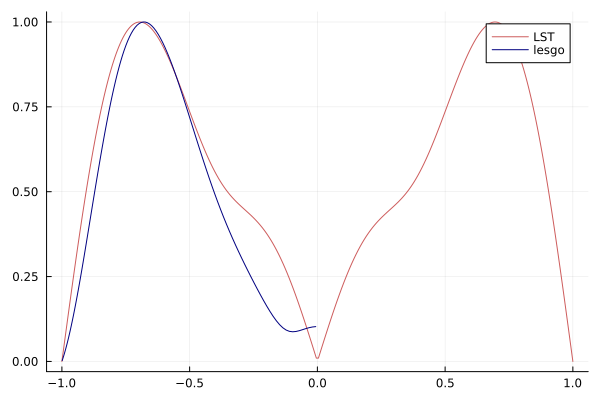

In [135]:
ind = 47
lesgo_ind = 126

print("LST eigenvalues = ", scalar_eigvals[ind], "\n")
print("lesgo eigenvalues = ", lesgo_eigvals[lesgo_ind], "\n")
# plot(y_phys, abs.(q[:, ind])/maximum(abs.(q[:, ind])), label="LST", color="indianred")
plot(y_phys, abs.(scalar_lst_Temperature[:, ind])/maximum(abs.(scalar_lst_Temperature[:, ind])), label="LST", color="indianred")

plot!(z_stretch.-1, abs.(lesgo_eigvecs[:, lesgo_ind])/maximum(abs.(lesgo_eigvecs[:, lesgo_ind])), label="lesgo", color="navy")



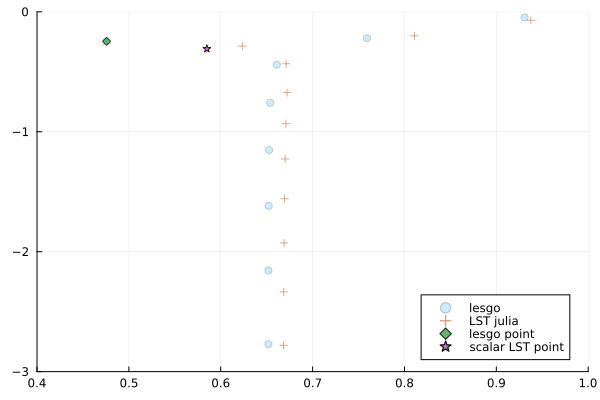

In [136]:
scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(scalar_eigvals), imag(scalar_eigvals), label="LST julia", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))
scatter!([real(lesgo_eigvals[lesgo_ind])], [imag(lesgo_eigvals[lesgo_ind])], label="lesgo point", markeralpha=0.8, marker=:diamond)
scatter!([real(scalar_eigvals[ind])], [imag(scalar_eigvals[ind])], label="scalar LST point", markeralpha=1, marker=:star, xlims=(0.4, 1), ylims=(-3, 0))


LST eigenvalues = 0.623468208600574 - 0.28483715444821633im
lesgo eigenvalues = 0.759180034838523 - 0.22000113162655752im


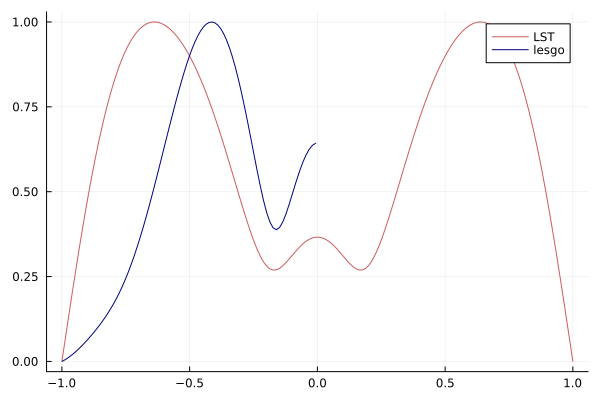

In [137]:
ind = 48
lesgo_ind = 127

print("LST eigenvalues = ", scalar_eigvals[ind], "\n")
print("lesgo eigenvalues = ", lesgo_eigvals[lesgo_ind], "\n")
# plot(y_phys, abs.(q[:, ind])/maximum(abs.(q[:, ind])), label="LST", color="indianred")
plot(y_phys, abs.(scalar_lst_Temperature[:, ind])/maximum(abs.(scalar_lst_Temperature[:, ind])), label="LST", color="indianred")

plot!(z_stretch.-1, abs.(lesgo_eigvecs[:, lesgo_ind])/maximum(abs.(lesgo_eigvecs[:, lesgo_ind])), label="lesgo", color="navy")



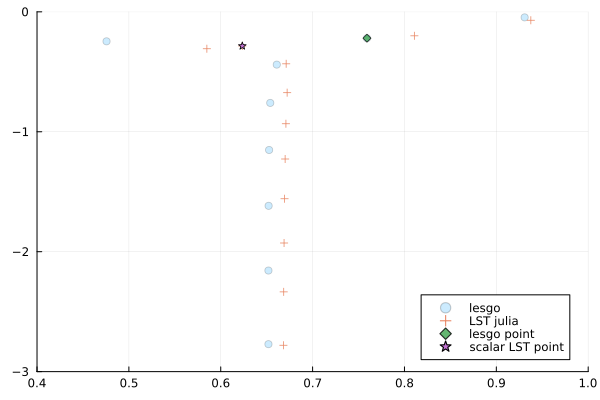

In [138]:
scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(scalar_eigvals), imag(scalar_eigvals), label="LST julia", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))
scatter!([real(lesgo_eigvals[lesgo_ind])], [imag(lesgo_eigvals[lesgo_ind])], label="lesgo point", markeralpha=0.8, marker=:diamond)
scatter!([real(scalar_eigvals[ind])], [imag(scalar_eigvals[ind])], label="scalar LST point", markeralpha=1, marker=:star, xlims=(0.4, 1), ylims=(-3, 0))


In [4]:
using Dash
# external_stylesheets = 'https://codepen.io/chriddyp/pen/bWLwgP.css'

app = dash()
# app = Dash(__name__, external_stylesheets=external_stylesheets)

dropdown_options = [
    Dict("label" => "New York City", "value" => "NYC"),
    Dict("label" => "Montreal", "value" => "MTL"),
    Dict("label" => "San Francisco", "value" => "SF"),
]

app.layout = html_div() do
        html_label("Layer Number:"),
        dcc_dropdown(options = dropdown_options, value = "MTL")
end

run_server(app, "127.0.0.1", 8088, debug=true)

┌ Info: Listening on: 127.0.0.1:8088, thread id: 1
└ @ HTTP.Servers /Users/user/.julia/packages/HTTP/uAaAw/src/Servers.jl:366
